# Exploratory data analysis (EDA) для [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import ast #parse the stringified features into their corresponding python objects
import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

###Загрузка данных в сессионное хранилище Google Colab

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download rounakbanik/the-movies-dataset
! unzip the-movies-dataset.zip

the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  the-movies-dataset.zip
replace credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


###Посмотрим на данные movies_metadata.csv и уберем признаки, несущие мало информации и добавим новые

In [ ]:
df = pd.read_csv('movies_metadata.csv')
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [ ]:
pd.Series(df.columns)

0                     adult
1     belongs_to_collection
2                    budget
3                    genres
4                  homepage
5                        id
6                   imdb_id
7         original_language
8            original_title
9                  overview
10               popularity
11              poster_path
12     production_companies
13     production_countries
14             release_date
15                  revenue
16                  runtime
17         spoken_languages
18                   status
19                  tagline
20                    title
21                    video
22             vote_average
23               vote_count
dtype: object

In [ ]:
df.shape

(45466, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
df = df.drop(['imdb_id'], axis=1)

In [ ]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [ ]:
df = df.drop(['original_title'], axis=1)

In [ ]:
df[df['revenue'].isnull()].shape

(6, 22)

In [ ]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [ ]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

In [ ]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape
#return value > 1 would indicate profit whereas a return value < 1 would indicate a loss

(40085, 23)

In [ ]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce') \
               .apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [ ]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [ ]:
df = df.drop('adult', axis=1)

In [ ]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

In [ ]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [ ]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

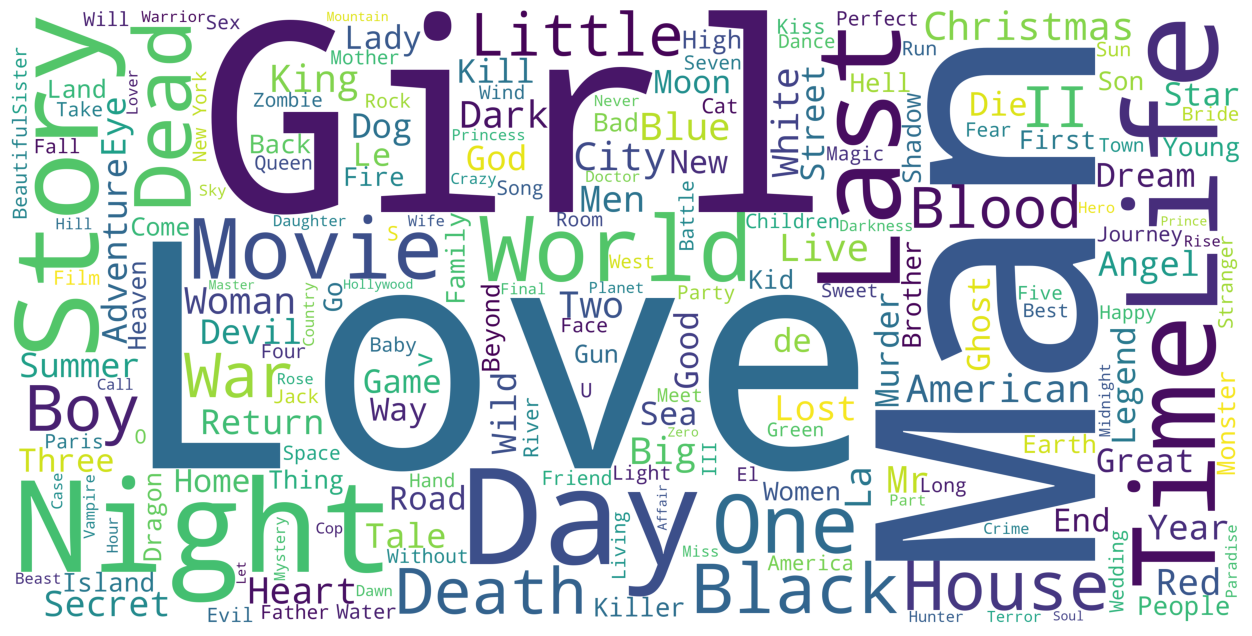

In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

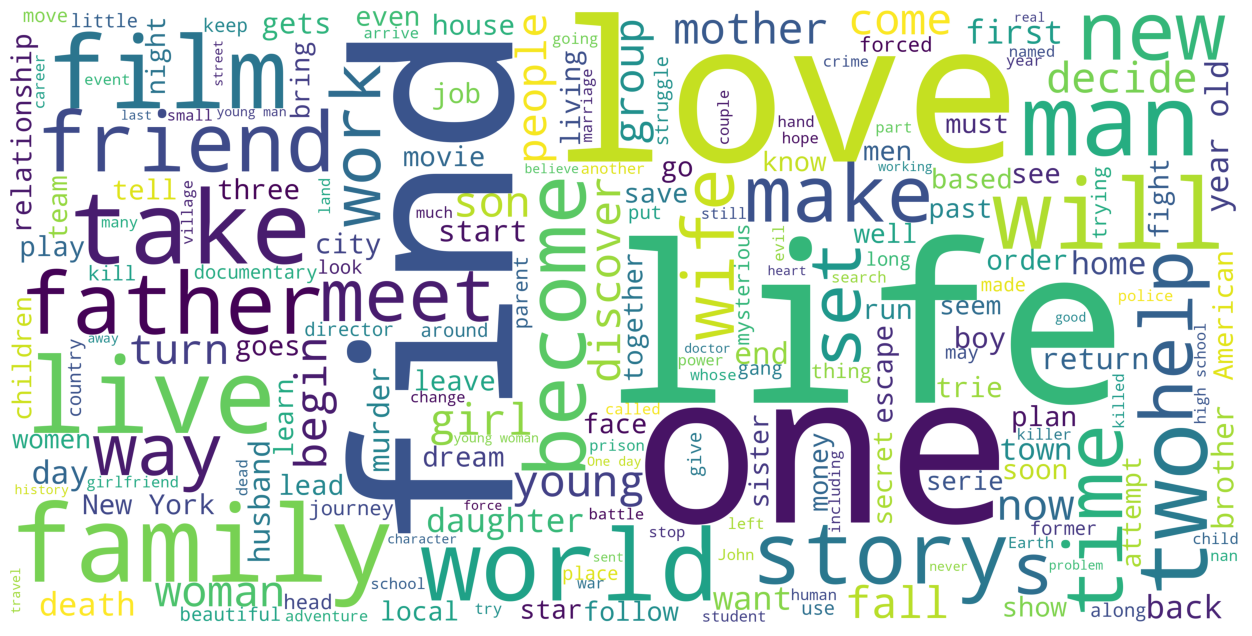

In [ ]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [ ]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [ ]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

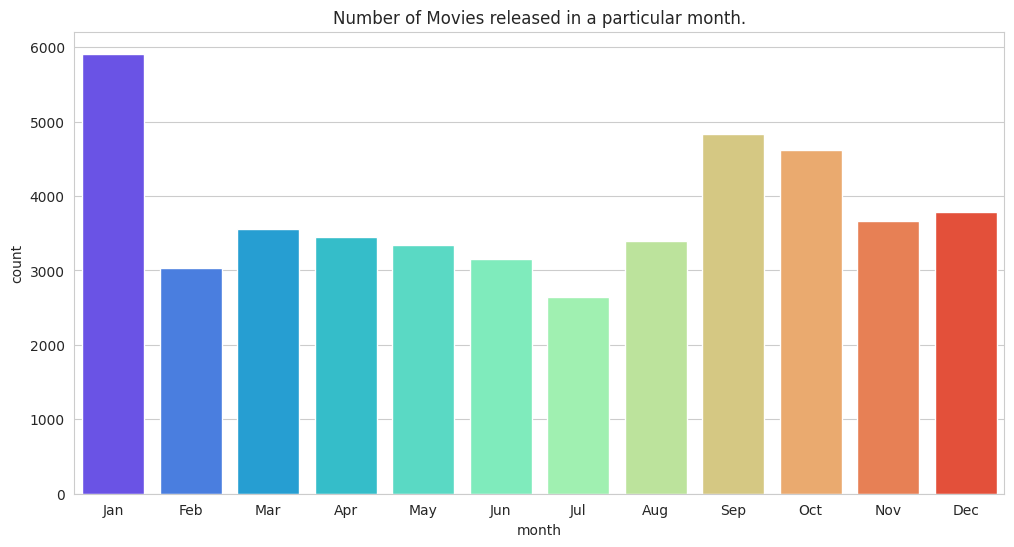

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order, palette='rainbow');

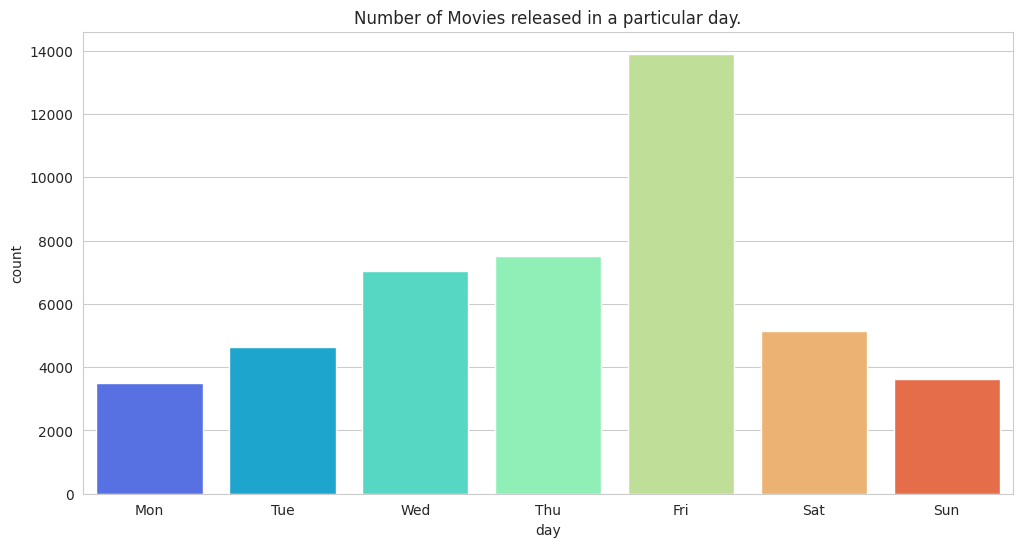

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular day.")
sns.countplot(x='day', data=df, order=day_order, palette='rainbow');

In [ ]:
df.head().transpose()

,0,1,2,3,4
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000.0,65000000.0,NaN,16000000.0,NaN
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//e64s...
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"


In [ ]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [ ]:
df['runtime'] = df['runtime'].astype('float')

In [ ]:
df['year'] = df['year'].replace('NaT', np.nan)

In [ ]:
df['year'] = df['year'].apply(clean_numeric)

In [ ]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval)
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

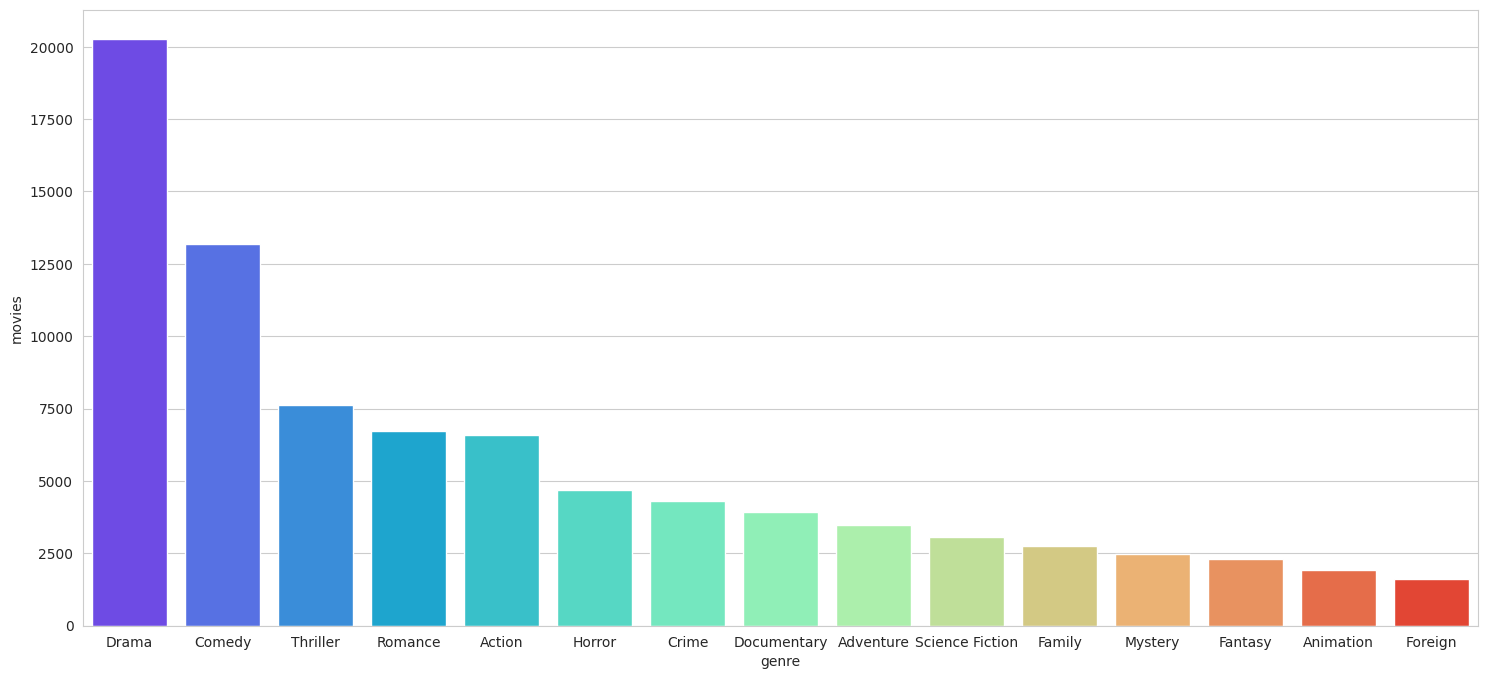

In [ ]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

gen_df = df.drop('genres', axis=1).join(s)

pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']

plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15), palette='rainbow')
plt.show()

In [ ]:
genres = list(pop_gen.genre.head(15))
genres

['Drama',
 'Comedy',
 'Thriller',
 'Romance',
 'Action',
 'Horror',
 'Crime',
 'Documentary',
 'Adventure',
 'Science Fiction',
 'Family',
 'Mystery',
 'Fantasy',
 'Animation',
 'Foreign']

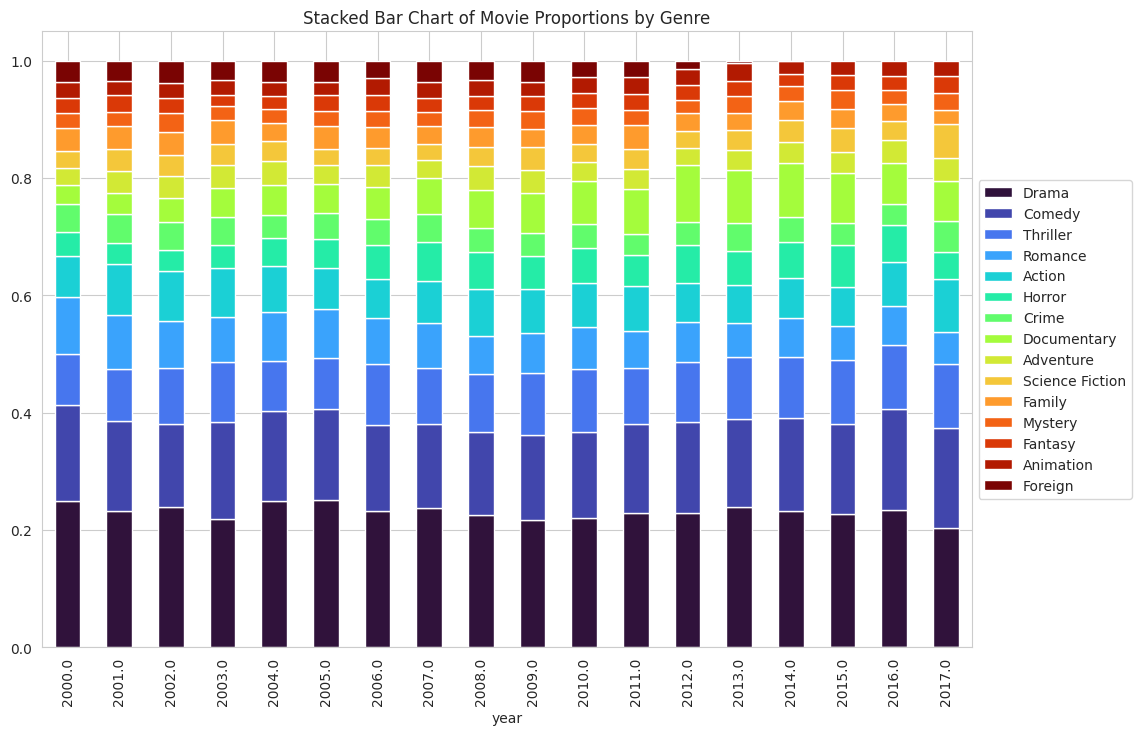

In [ ]:
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2000) & (gen_df['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='turbo', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

###Рассмотрим теперь credits.csv, соединим данные из двух таблиц

In [ ]:
credits_df = pd.read_csv('credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
df['id'] = df['id'].apply(convert_int)

In [ ]:
df[df['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midni...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardo...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avala...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop([19730, 29503, 35587])

In [ ]:
df['id'] = df['id'].astype('int')

In [ ]:
df = df.merge(credits_df, on='id')
df.shape

(45538, 27)

In [ ]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [ ]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [ ]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
df['director'] = df['crew'].apply(get_director)

In [ ]:
df.head().transpose()

,0,1,2,3,4
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000.0,65000000.0,NaN,16000000.0,NaN
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//e64s...
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"


#Общая функция для обработки датасета

In [ ]:
df = pd.read_csv('drive/MyDrive/the_movies_dataset/movies_metadata.csv')
df.head().transpose()

In [ ]:
def preprocessed(df = df):
    df = df.drop(['imdb_id', 'adult', 'original_title'], axis=1)
    df = df.drop([19730, 29503, 35587]) #id is None

    base_poster_url = 'http://image.tmdb.org/t/p/w185/'
    df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

    def convert_float(x):
        try:
            return float(x)
        except:
            return np.nan

    def convert_int(x):
        try:
            return int(x)
        except:
            return np.nan

    df['popularity'] = df['popularity'].apply(convert_float).astype('float')
    df['vote_count'] = df['vote_count'].apply(convert_float).astype('float')
    df['vote_average'] = df['vote_average'].apply(convert_float).astype('float')
    df['id'] = df['id'].apply(convert_int).astype('int')
    df['runtime'] = df['runtime'].astype('float')
    df['title'] = df['title'].astype('str')
    df['overview'] = df['overview'].astype('str')

    df['year'] = pd.to_datetime(df['release_date'], errors='coerce') \
                   .apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
    df['year'] = df['year'].replace('NaT', np.nan).apply(convert_float)

    df['revenue'] = df['revenue'].replace(0, np.nan)

    df['budget'] = pd.to_numeric(df['budget'], errors='coerce').replace(0, np.nan)

    #return value > 1 would indicate profit whereas a return value < 1 would indicate a loss
    df['return'] = df['revenue'] / df['budget']

    df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
    df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

    df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
    df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

    df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
    df['spoken_languages'] = df['spoken_languages'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

    df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval)
    df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

    #cjoin'им с другой таблицей
    credits_df = pd.read_csv('drive/MyDrive/the_movies_dataset/credits.csv')

    df = df.merge(credits_df, on='id')

    df['cast'] = df['cast'].apply(ast.literal_eval)
    df['crew'] = df['crew'].apply(ast.literal_eval)

    df['cast_size'] = df['cast'].apply(lambda x: len(x))
    df['crew_size'] = df['crew'].apply(lambda x: len(x))

    df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

    def get_director(x):
        for i in x:
            if i['job'] == 'Director':
                return i['name']
        return np.nan

    df['director'] = df['crew'].apply(get_director)

    return df

In [ ]:
df = preprocessed(df)
df.head().transpose()